In [ ]:
# Introduction
import numpy as np
import pandas as pd

# read the dataset into a pandas dataframe
f500 = pd.read_csv("../dataset/f500.csv", index_col = 0)
f500.index.name = None

# replace 0 values in the "previous_rank" column with NaN
f500.loc[f500["previous_rank"] == 0, "previous_rank"] = np.nan
f500_selection = f500[['rank', 'revenues', 'revenue_change']].head()

f500_selection.head()

In [ ]:
# Reading CSV Files with pandas
f500 = pd.read_csv("../dataset/f500.csv", index_col=0)
print(f500[['rank', 'revenues', 'revenue_change']].head())


In [ ]:
# Reading CSV Files with pandas
f500 = pd.read_csv("../dataset/f500.csv")
f500.index.name = 'Company'
f500.columns.name = 'Metric'
print(f500)
f500.loc[f500["previous_rank"] == 0, "previous_rank"] = np.nan


In [ ]:
# Using iloc to Select by Integer Location
fifth_row = f500.iloc[4]
company_value = f500.iloc[0, 0]

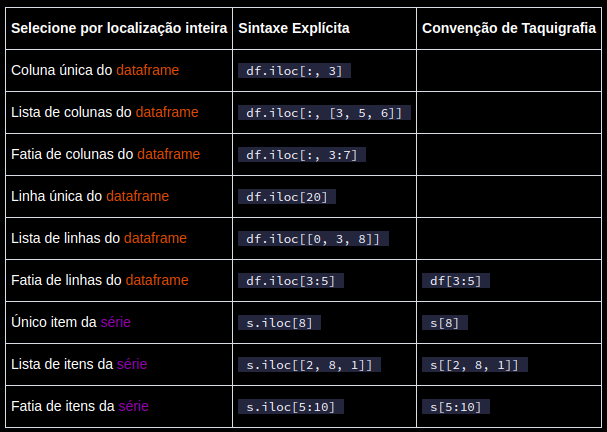

In [ ]:
# Using iloc to Select by Integer Location (Continued)
first_three_rows = f500.iloc[:3]
first_seventh_row_slice = f500.iloc[[1, 7], :5]

null_prev_rank = f500[f500["previous_rank"].isnull()][["company","rank", "previous_rank"]]
first_null_prev_rank = null_prev_rank.iloc[0]
top5_null_prev_rank = null_prev_rank.iloc[:5]
print(top5_null_prev_rank)

In [ ]:
# Using pandas Methods to Create Boolean Masks

# Primeiro, criamos rev_change_nulluma máscara booleana, usando Series.isnull(). A série resultante vale True para linhas onde revenue_change está faltando em f500 (is_null) e False para caso contrário.
rev_change_null = f500["revenue_change"].isnull()
print(rev_change_null.head())


print(f500[rev_change_null][["company", "country", "sector"]])

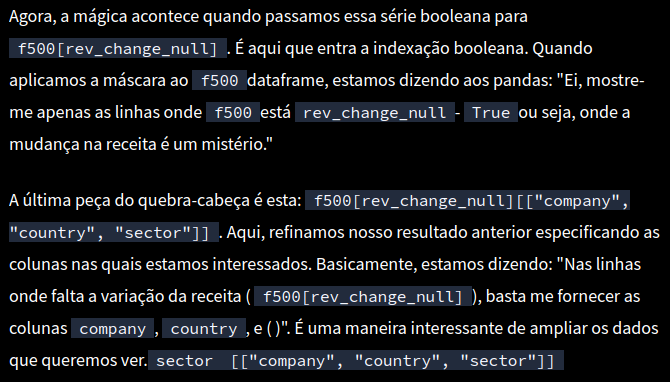

In [ ]:
prev_rank_null = f500['previous_rank'].isnull()
null_prev_rank = f500[prev_rank_null][['company', 'rank', 'previous_rank']]
null_prev_rank.head()

In [ ]:
# Working with Integer Labels

null_prev_rank = f500[f500["previous_rank"].isnull()]
first_null_prev_rank = null_prev_rank.iloc[0] # or first_null_prev_rank = null_prev_rank.loc[48]
print(first_null_prev_rank)

# using loc
#top5_null_prev_rank = null_prev_rank.loc[[48, 90, 123, 138, 140]]

# using iloc 
top5_null_prev_rank = null_prev_rank.iloc[:5]
print(top5_null_prev_rank)


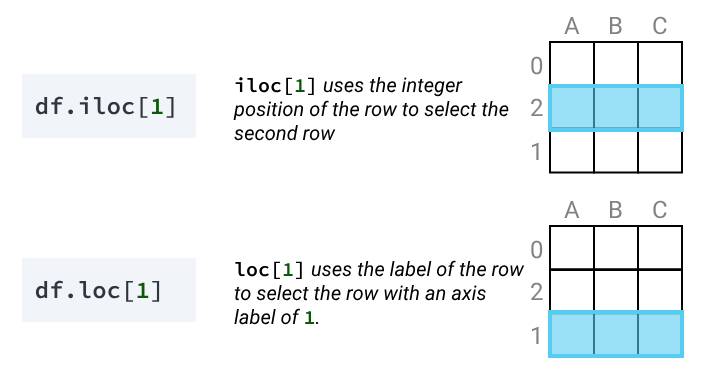
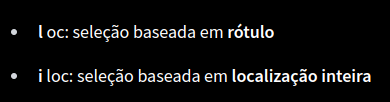

In [ ]:
# Pandas Index Alignment

previously_ranked = f500[f500["previous_rank"].notnull()]
rank_change = previously_ranked["previous_rank"] - previously_ranked["rank"]
print(rank_change.shape)
print(rank_change.tail(3))

profited = f500[f500['profits'].notnull()]
costs =  profited['revenues'] - profited['profits']
f500['costs'] = costs

f500.head()


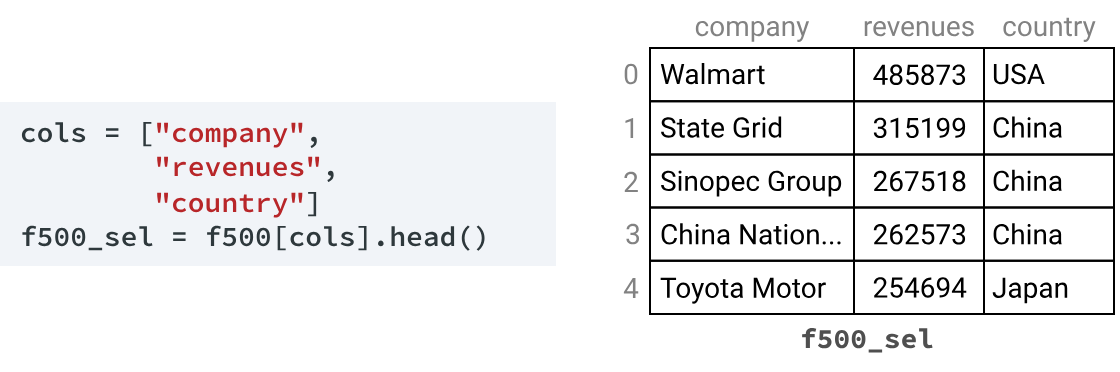
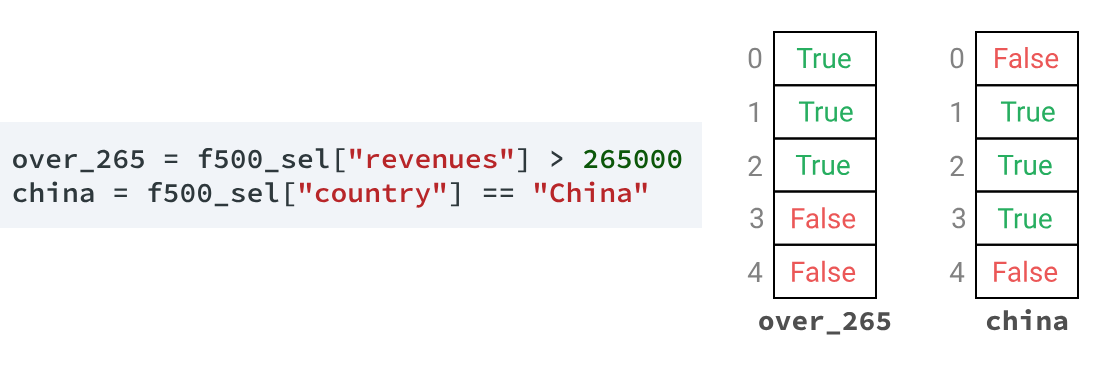
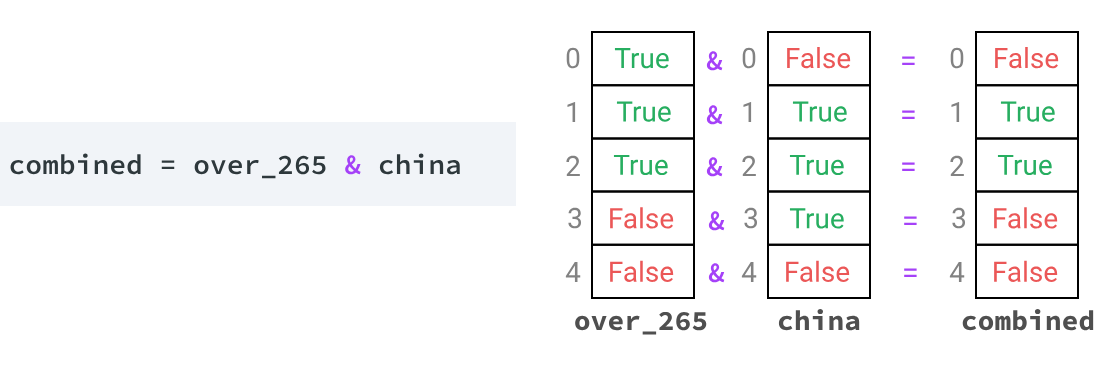
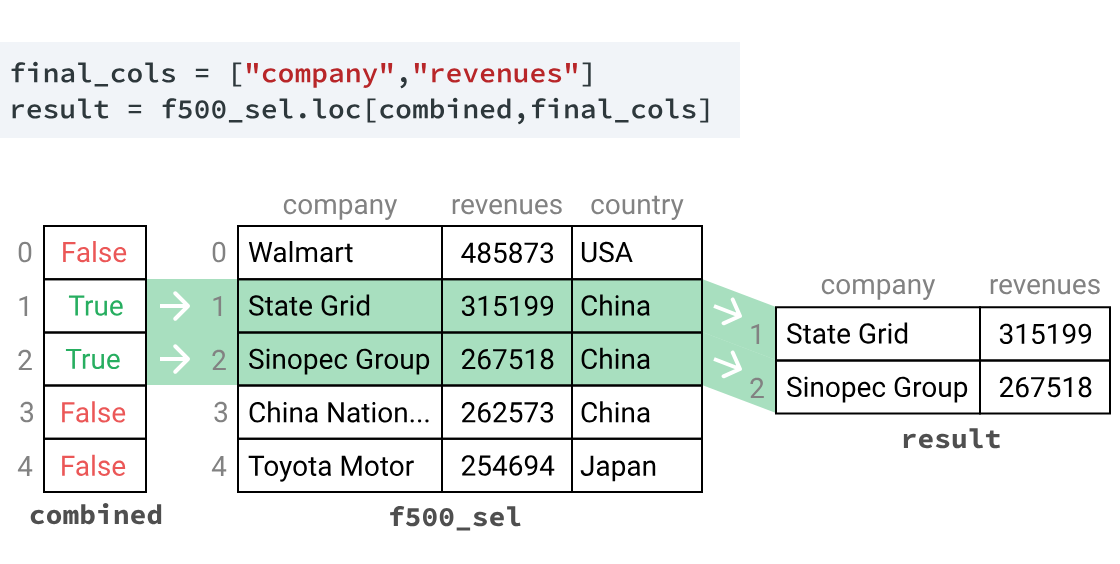


In [ ]:
# Using Boolean Operators

large_revenue = f500['revenues'] > 100000
negative_profits = f500['profits'] < 0
combined = large_revenue & negative_profits

big_rev_neg_profit = f500[combined]
print(big_rev_neg_profit)

# VERSION 2
# combined = (f500['revenues'] > 100000) & (f500['profits'] < 0)
# big_rev_neg_profit = f500[combined]
# print(big_rev_neg_profit)

# VERSION 3
# big_rev_neg_profit = f500[(f500['revenues'] > 100000) & (f500['profits'] < 0)]
# print(big_rev_neg_profit)



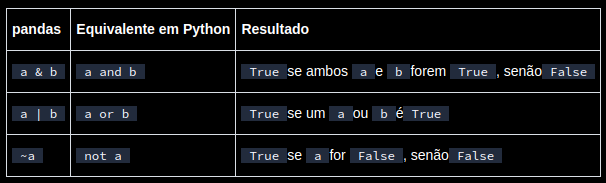

In [ ]:
# Using Boolean Operators (Continued)
brazil_venezuela = f500[(f500['country'] == 'Brazil') | (f500['country'] == 'Venezuela')]

# only 5 lines in the dataframe
tech_outside_usa = f500[(f500['sector'] == 'Technology') & ((f500['country'] != 'USA'))].head()



In [ ]:
# Sorting Values

# Suponha que quiséssemos encontrar a empresa que emprega mais pessoas na China. Podemos fazer isso selecionando primeiro todas as linhas onde a countrycoluna é igual China

selected_rows = f500[f500["country"] == "China"]
sorted_rows = selected_rows.sort_values("employees", ascending=False)
print(sorted_rows[["company", "country", "employees"]].head())

In [ ]:
# Sorting Values

selected_rows = f500[f500["country"] == "Japan"]
sorted_rows = selected_rows.sort_values("profits", ascending=False)
top_japanese_company = sorted_rows.iloc[0][["company", "profits"]]
print(top_japanese_company)



In [ ]:
# Using Loops with pandas

# Create an empty dictionary to store the results
avg_rev_by_country = {}

# Create an array of unique countries
countries = f500["country"].unique()

# Use a for loop to iterate over the unique countries
for c in countries:
    # Use a boolean comparison to select only rows that
    # correspond to the country for this iteration
    selected_rows = f500[f500["country"] == c]
    # Calculate the mean revenue for the selected rows
    mean = selected_rows["revenues"].mean()
    # Assign the mean value to the dictionary, using the
    # country name as the key
    avg_rev_by_country[c] = mean

In [141]:
# Using Loops with pandas (Continued)

top_employer_by_country = {}
countries = f500["country"].unique()

for c in countries:
    selected_rows = f500[f500["country"] == c]
    sorted_rows = selected_rows.sort_values('employees', ascending=False)
    top_employer_by_country[c] = sorted_rows.iloc[0]['company']

print(top_employer_by_country)


{'USA': 'Walmart', 'China': 'China National Petroleum', 'Japan': 'Toyota Motor', 'Germany': 'Volkswagen', 'Netherlands': 'EXOR Group', 'Britain': 'Compass Group', 'South Korea': 'Samsung Electronics', 'Switzerland': 'Nestle', 'France': 'Sodexo', 'Taiwan': 'Hon Hai Precision Industry', 'Singapore': 'Flex', 'Italy': 'Poste Italiane', 'Russia': 'Gazprom', 'Spain': 'Banco Santander', 'Brazil': 'JBS', 'Mexico': 'America Movil', 'Luxembourg': 'ArcelorMittal', 'India': 'State Bank of India', 'Malaysia': 'Petronas', 'Thailand': 'PTT', 'Australia': 'Wesfarmers', 'Belgium': 'Anheuser-Busch InBev', 'Norway': 'Statoil', 'Canada': 'George Weston', 'Ireland': 'Accenture', 'Indonesia': 'Pertamina', 'Denmark': 'Maersk Group', 'Saudi Arabia': 'SABIC', 'Sweden': 'H & M Hennes & Mauritz', 'Finland': 'Nokia', 'Venezuela': 'Mercantil Servicios Financieros', 'Turkey': 'Koc Holding', 'U.A.E': 'Emirates Group', 'Israel': 'Teva Pharmaceutical Industries'}


In [152]:
# Challenge: Calculating Return on Assets by Sector

top_roa_by_sector = {}
f500['roa'] = f500['profits'] / f500['assets']
sectors = f500['sector'].unique()

for sec in sectors:
    selected_rows = f500[f500['sector'] == sec]
    sorted_rows = selected_rows.sort_values('roa', ascending = False)
    top_roa_by_sector[sec] = sorted_rows.iloc[0]['company']

print(top_roa_by_sector)




{'Retailing': 'H & M Hennes & Mauritz', 'Energy': 'National Grid', 'Motor Vehicles & Parts': 'Subaru', 'Financials': 'Berkshire Hathaway', 'Technology': 'Accenture', 'Wholesalers': 'McKesson', 'Health Care': 'Gilead Sciences', 'Telecommunications': 'KDDI', 'Engineering & Construction': 'Pacific Construction Group', 'Industrials': '3M', 'Food & Drug Stores': 'Publix Super Markets', 'Aerospace & Defense': 'Lockheed Martin', 'Food, Beverages & Tobacco': 'Philip Morris International', 'Household Products': 'Unilever', 'Transportation': 'Delta Air Lines', 'Materials': 'CRH', 'Chemicals': 'LyondellBasell Industries', 'Media': 'Disney', 'Apparel': 'Nike', 'Hotels, Restaurants & Leisure': 'McDonald’s', 'Business Services': 'Adecco Group'}
